In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Load the pumpkin data
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [56]:
# Missing values
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [57]:
# Information about the dataset
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [58]:
# Statistical summary
pumpkins.describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Unnamed: 24
count,0.0,1757.000000,1757.000000,1654.000000,1654.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,124.571338,132.970939,128.170550,132.491802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,83.876591,89.524958,86.512161,88.442967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.240000,0.240000,0.240000,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,24.500000,24.625000,26.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,140.000000,150.000000,147.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,180.000000,200.000000,185.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,480.000000,480.000000,480.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Data cleaning and preparation
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins['Price'] = pumpkins['Low Price'] + pumpkins['High Price'] / 2
pumpkins['Month'] = pd.DatetimeIndex(pumpkins['Date']).month
pumpkins['Package'] = pumpkins['Package'].str.extract('(\d+)').astype(float)
pumpkins['Price per bushel'] = np.where(
    pumpkins['Package'] == 1.5, 
    pumpkins['Price'] / 1.5, 
    pumpkins['Price'] / pumpkins['Package']
)

# Filter out outliers
pumpkins = pumpkins[pumpkins['Price per bushel'] < 100]

Scatter Plot using Matplotlib

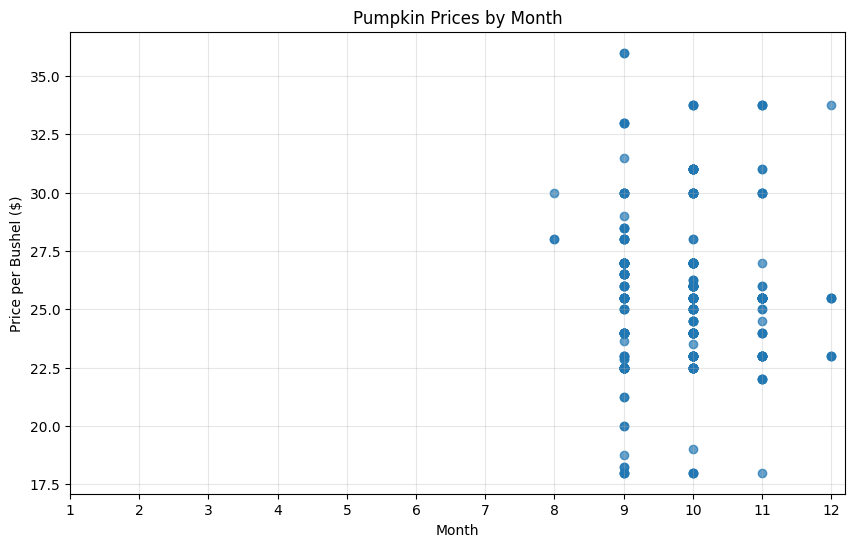

In [60]:
# Matplotlib scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pumpkins['Month'], pumpkins['Price per bushel'], alpha=0.7)
plt.title('Pumpkin Prices by Month')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

Scatter Plot using Seaborn

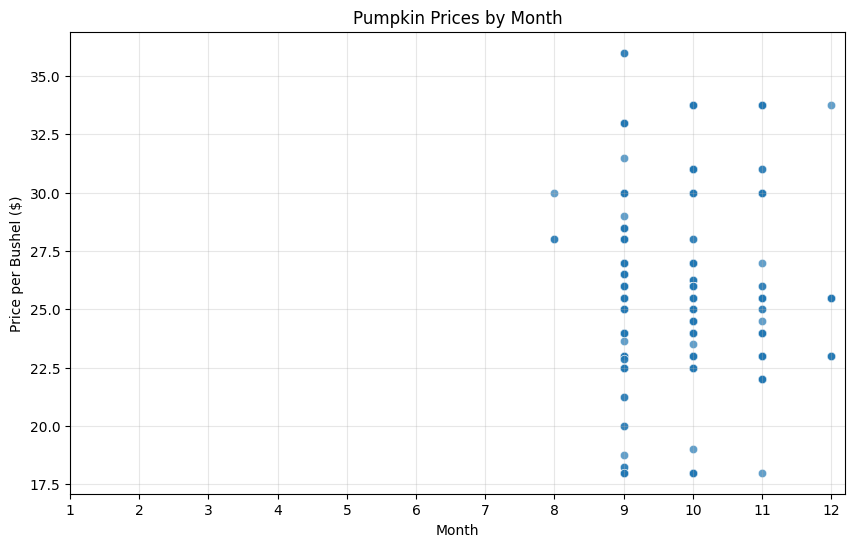

In [61]:
# Seaborn scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pumpkins, x='Month', y='Price per bushel', alpha=0.7)
plt.title('Pumpkin Prices by Month')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

Boxplot using matplotlib

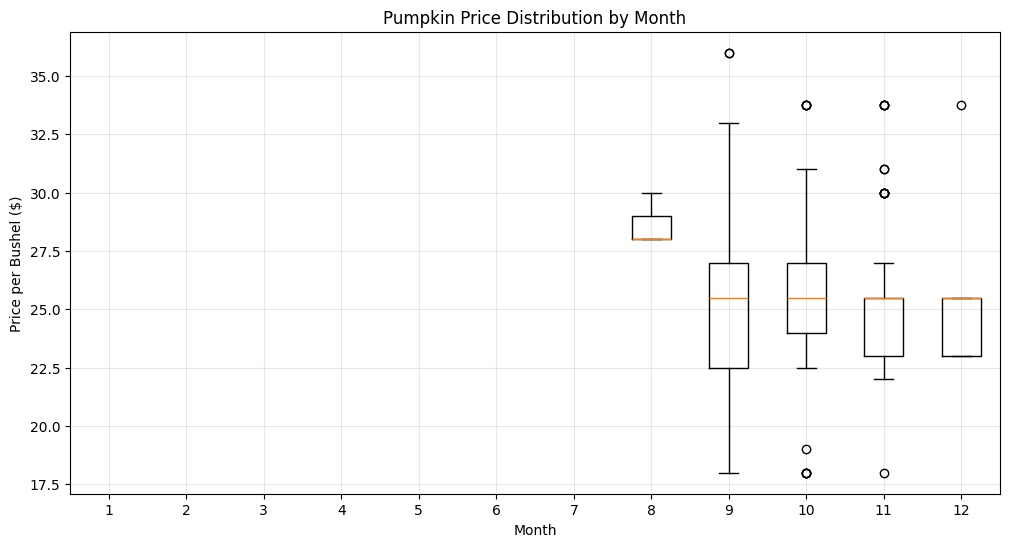

In [62]:
# Matplotlib box plot
plt.figure(figsize=(12, 6))
month_data = [pumpkins[pumpkins['Month'] == month]['Price per bushel'] for month in range(1, 13)]
plt.boxplot(month_data, labels=range(1, 13))
plt.title('Pumpkin Price Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.show()

Boxplot using Seaborn

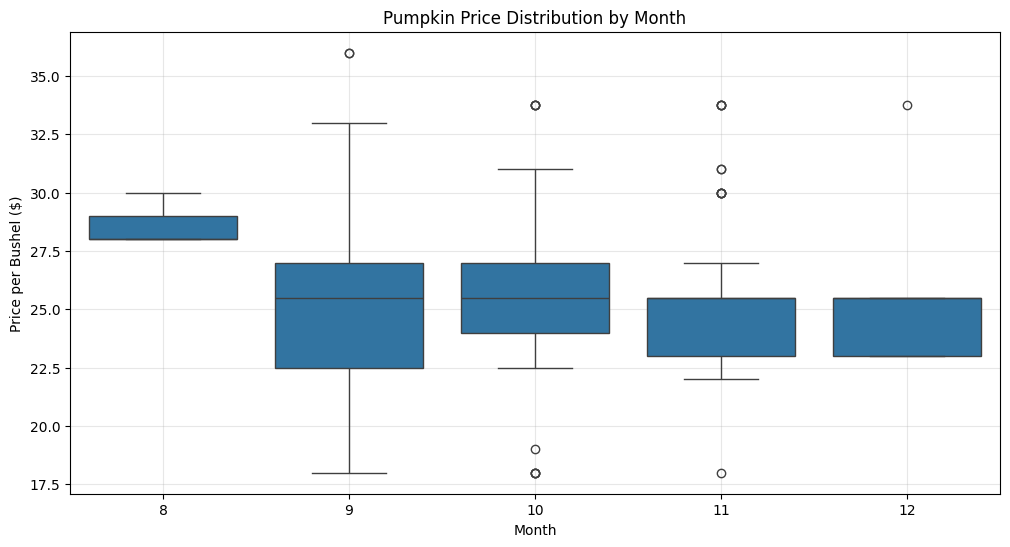

In [63]:
# Seaborn box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=pumpkins, x='Month', y='Price per bushel')
plt.title('Pumpkin Price Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.show()

Violin plot using Seaborn

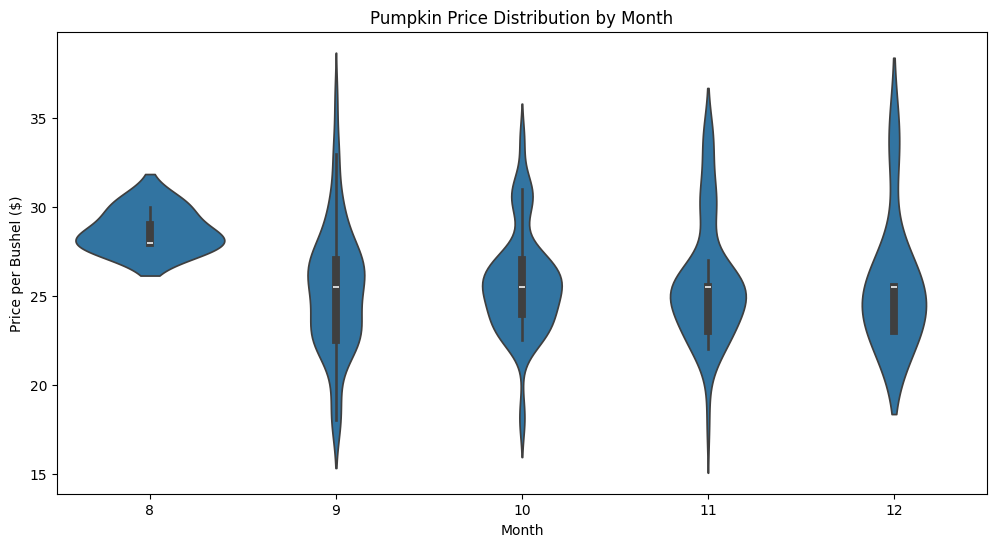

In [64]:
# Seaborn violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=pumpkins, x='Month', y='Price per bushel')
plt.title('Pumpkin Price Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.show()

Time-series plot using Matplotlib

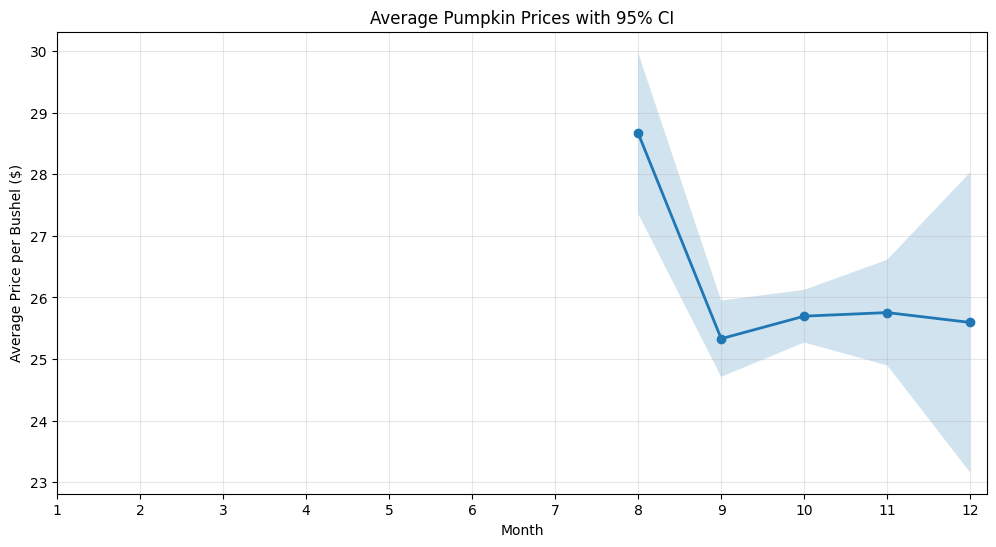

In [65]:
# Matplotlib - would need to calculate confidence intervals manually
monthly_avg = pumpkins.groupby('Month')['Price per bushel'].mean()
monthly_std = pumpkins.groupby('Month')['Price per bushel'].std()
monthly_count = pumpkins.groupby('Month')['Price per bushel'].count()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2)
plt.fill_between(monthly_avg.index, 
                monthly_avg - 1.96*monthly_std/np.sqrt(monthly_count),
                monthly_avg + 1.96*monthly_std/np.sqrt(monthly_count),
                alpha=0.2)
plt.title('Average Pumpkin Prices with 95% CI')
plt.xlabel('Month')
plt.ylabel('Average Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

Time-series plot using Seaborn

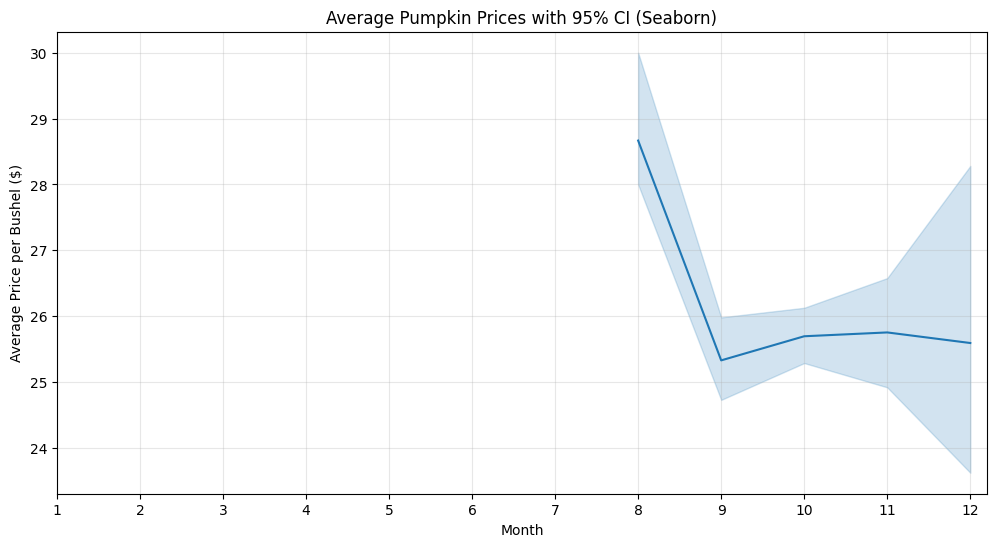

In [66]:
# Seaborn line plot with confidence intervals
plt.figure(figsize=(12, 6))
sns.lineplot(data=pumpkins, x='Month', y='Price per bushel', errorbar='ci')
plt.title('Average Pumpkin Prices with 95% CI (Seaborn)')
plt.xlabel('Month')
plt.ylabel('Average Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

Histogram using Matplotlib with KDE

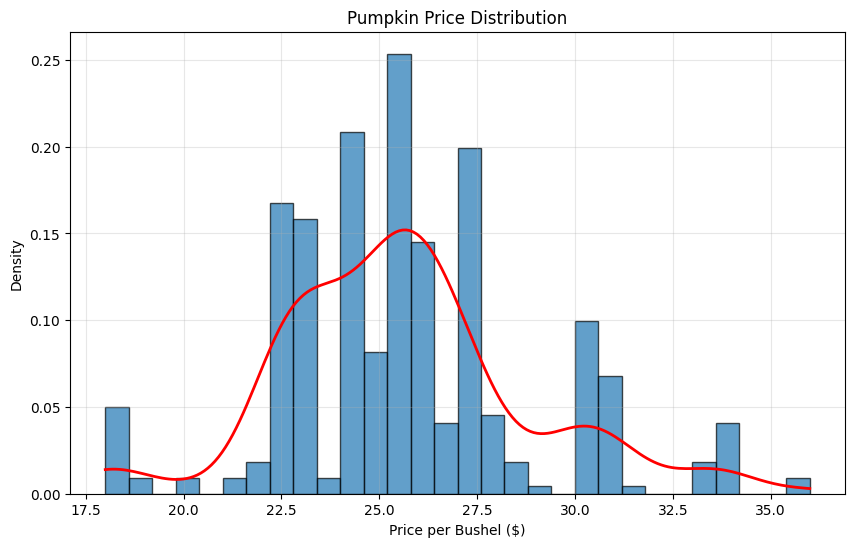

In [67]:
# Matplotlib histogram
plt.figure(figsize=(10, 6))
plt.hist(pumpkins['Price per bushel'], bins=30, density=True, alpha=0.7, edgecolor='black')

# Add density curve manually
from scipy.stats import gaussian_kde
density = gaussian_kde(pumpkins['Price per bushel'].dropna())
xs = np.linspace(pumpkins['Price per bushel'].min(), pumpkins['Price per bushel'].max(), 200)
plt.plot(xs, density(xs), 'r-', linewidth=2)

plt.title('Pumpkin Price Distribution')
plt.xlabel('Price per Bushel ($)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

Histogram using Seaborn with KDE

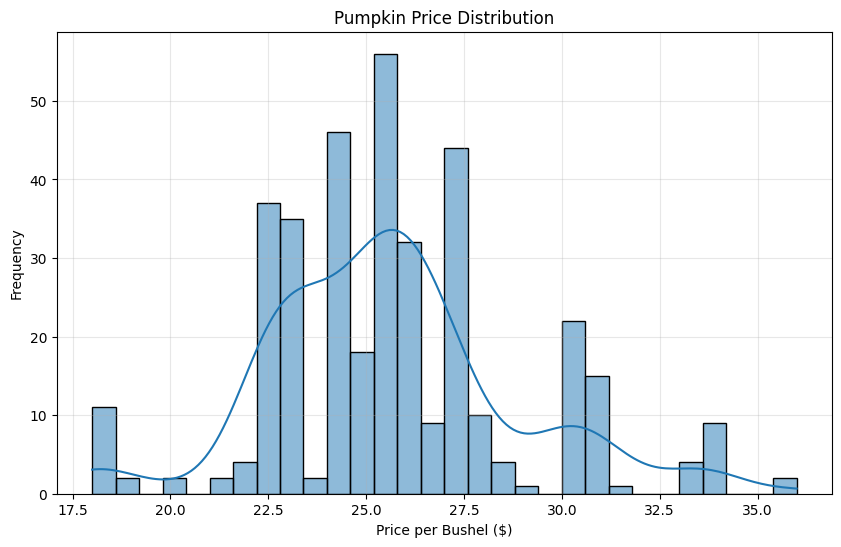

In [68]:
# Seaborn histogram with density curve
plt.figure(figsize=(10, 6))
sns.histplot(data=pumpkins, x='Price per bushel', kde=True, bins=30)
plt.title('Pumpkin Price Distribution')
plt.xlabel('Price per Bushel ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

Heatmap using matplotlib

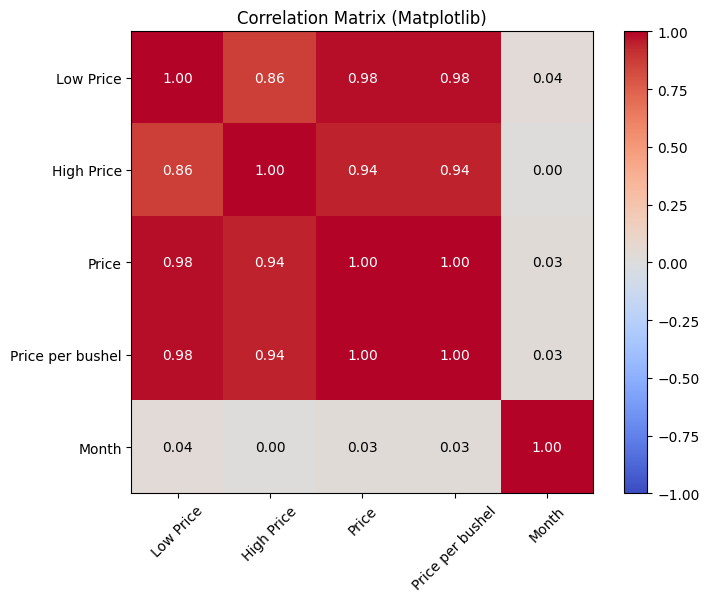

In [69]:
# Matplotlib heatmap (more complex)
corr_matrix = pumpkins[['Low Price', 'High Price', 'Price', 'Price per bushel', 'Month']].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix (Matplotlib)')

# Add correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')
plt.show()

Heatmap using Seaborn

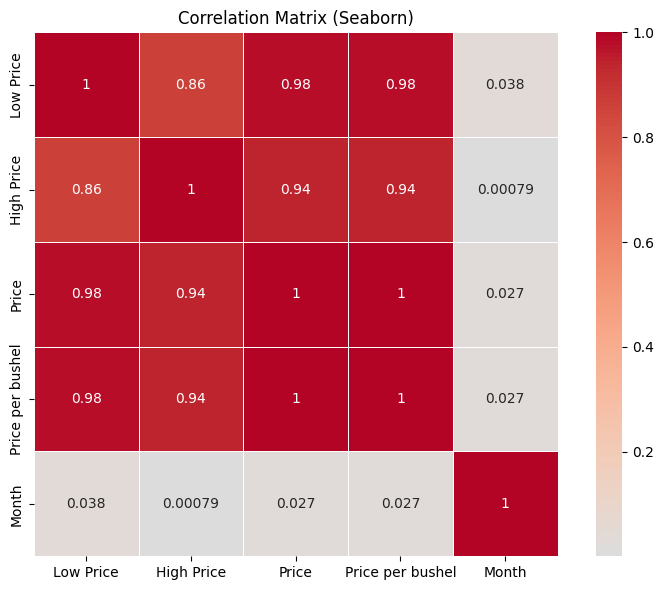

In [70]:
# Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5)
plt.title('Correlation Matrix (Seaborn)')
plt.tight_layout()
plt.show()